In [182]:
## This code shows an overview of the movie ratings of each genre and each decade
imdb_top_movies["decade"] = (imdb_top_movies["year"]//10)*10

## using pd.explode to  create a new row for each genre
imdb_temp = imdb_top_movies[["genres", "decade", "rating"]].assign( genres = imdb_top_movies["genres"].str.split(", ")).explode("genres")

## cleaning up the genres coloumn
imdb_temp["genres"] = imdb_temp["genres"].str.replace("[", "").str.replace("'","").str.replace("]", "")

## grouping first by genre and then by decade. Using unstack to create a matrix to better read the results
result = round(imdb_temp.groupby(["genres", "decade"])["rating"].mean(),2).unstack("decade")
result.fillna("-")

decade,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
genres,,,,,,,,,,,
Action,8.15,-,-,8.6,8.4,8.6,8.3,8.36,8.52,8.29,-
Adventure,8.15,-,8.2,8.24,8.27,8.3,8.3,8.32,8.39,8.31,8.1
Animation,-,-,-,-,-,-,8.27,8.32,8.24,8.25,8.1
Biography,8.1,-,-,-,8.2,-,8.2,8.5,8.19,8.2,8.5
Comedy,8.2,8.3,8.3,8.25,8.35,8.2,8.3,8.26,8.21,8.23,8.1
Crime,-,8.3,8.3,8.3,8.27,8.62,8.35,8.36,8.35,8.21,-
Drama,8.18,8.3,8.34,8.27,8.23,8.36,8.25,8.4,8.31,8.25,8.4
Family,8.3,8.5,8.6,-,-,-,8.15,8.37,8.25,8.23,8.1
Fantasy,-,-,8.6,8.2,-,8.4,8.28,8.35,8.5,8.22,8.1


In [3]:
## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math
import json
import urllib
import requests

In [185]:
## reread dataset it if necessary
#imdb_top_movies = pd.read_csv("imdb_top_movies.csv")


In [177]:
## using the pd.explode to create a new row for each actor but with values in all other rows remaining constant
imdb_temp = imdb_top_movies[["starring", "movie_name"]].assign( starring = imdb_top_movies["starring"].str.split(", ")).explode("starring")

## cleaning up the actor column from all unnecessary 
imdb_temp["starring"] = imdb_temp["starring"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "")

## have a look at the data
print(imdb_temp)

             starring                movie_name
0         Tim Robbins  The Shawshank Redemption
0      Morgan Freeman  The Shawshank Redemption
0          Bob Gunton  The Shawshank Redemption
1       Marlon Brando             The Godfather
1           Al Pacino             The Godfather
..                ...                       ...
248  Nastassja Kinski              Paris, Texas
248    Dean Stockwell              Paris, Texas
249    Toshirô Mifune           Throne of Blood
249     Minoru Chiaki           Throne of Blood
249      Isuzu Yamada           Throne of Blood

[750 rows x 2 columns]


In [178]:
## grouping by starring and counting the movies they appeared 
result = pd.DataFrame(imdb_temp.groupby(["starring"])["movie_name"].count())
result = result.rename(columns = {"movie_name": "count"})

## create a while function that will ask how many artists with the most movie starring should be displayed
numbersEntered = []  # List that stores all entered numbers
numberList = []  # List when several numbers are entered at once

while len(numbersEntered) <= 0:

    # Input, programme description
    numberInput = str(input('Please enter how many top actors (measured in #of movies you would liek todisplay):'))

    # Find all positive and negative float or int numbers in the input
    numberList = re.findall(r'[-]?\d*\.\d+|[-]?\d+', numberInput)

    # Add the numbers entered now to the list of all entered numbers
    for i in range(len(numberList)):
        numbersEntered.append(float(numberList[i]))
        i += 1
       
        
# Using nlargerst function to show the top 10 actors. Please keep in mind, that there are more actors who also had 4 apprences in the movies
result.nlargest(int(numbersEntered[0]), "count")


Please enter how many top actors (measured in #of movies you would liek todisplay):10


,count
starring,
Robert De Niro,9
Harrison Ford,6
Leonardo DiCaprio,6
Tom Hanks,6
Charles Chaplin,5
Christian Bale,5
Clint Eastwood,5
James Stewart,5
Toshirô Mifune,5


In [179]:
# ask for the idol as string input
idol = input("What is your favorite movie star? please write it in the following format: first name last name (e.g. Brad Pitt): ")

if (sum(imdb_temp.starring == idol)>0):
    print("Your idol, ", idol, " has appeared", sum(imdb_temp.starring == idol), "times in the top 250 movies")
else: print("Sorry, you have either misspelled the name or,", idol, " did not act in any of the top 250 movies")

What is your favorite movie star? please write it in the following format: first name last name (e.g. Brad Pitt): Brad Pitt
Your idol,  Brad Pitt  has appeared 4 times in the top 250 movies


In [180]:
## cleaning the revenue data by removing Dollar signs, commas and droping rows with NaN values. Also transforing the values into floats
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace(',', '')
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace('$', '')
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].dropna()
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].astype(float) #redefine as float numbers
imdb_top_movies["box_office_revenue"]=(imdb_top_movies["box_office_revenue"]/1000000).round(0) ## divide by 1'000'000 to get numbers in millions
imdb_temp = imdb_top_movies[["director", "box_office_revenue"]]

In [181]:
## ask for the input
director_count = input("how many of the top directors by revenue would you like to display? ")

## make a function to return the box office of number of directors and return error message if no integer was entered
## divide by 1'000'000 to get numbers in millions
try:
    top_x_directors = imdb_temp.groupby(["director"]).sum().nlargest(int(director_count),"box_office_revenue")
    print(top_x_directors)
except ValueError:
    print("sorry you have to enter an integer number")
    
print("note that all values are in USD million")

how many of the top directors by revenue would you like to display? 10
                   box_office_revenue
director                             
Anthony Russo                  4846.0
Christopher Nolan              4150.0
Steven Spielberg               3054.0
Peter Jackson                  2991.0
Pete Docter                    2291.0
Lee Unkrich                    1875.0
Andrew Stanton                 1461.0
David Yates                    1342.0
Martin Scorsese                1192.0
Quentin Tarantino              1145.0


In [4]:
##---------------Analysis of Gender by film-------------------

## we get our data as a JSON database from "back4app":
## this database includes 250,000 different names and assigns wether they are for boys or girls

url = 'https://parseapi.back4app.com/classes/Complete_List_Names?limit=250000'
headers = {
    'X-Parse-Application-Id': 'zsSkPsDYTc2hmphLjjs9hz2Q3EXmnSxUyXnouj1I', 
    'X-Parse-Master-Key': '4LuCXgPPXXO2sU5cXm6WwpwzaKyZpo3Wpj4G4xXK' 
}
data = json.loads(requests.get(url, headers=headers).content.decode('utf-8')) 

# define the fields of interest and normalize data using "json_normalize"
FIELDS = ["Name", "Gender"]
name_database_all = pd.json_normalize(data["results"])
name_database = name_database_all[FIELDS]
# locating the two columns and we remove duplicate names
name_database = name_database.loc[:, ["Name", "Gender"]]
name_database = name_database.drop_duplicates()

## we now have a datababase with 250 000 names and the repsective gender
## we can now match the scrapednames from the actors with the names in these database and get an indication wheter it is a male or female name
print(name_database)

          Name  Gender
0         Will    male
1        James    male
2       Samuel    male
3         John    male
4       George    male
...        ...     ...
249995  Adrian  female
249996  Melisa  female
249997     Sky  female
249998   Kenia  female
249999   Maiya  female

[250000 rows x 2 columns]


In [7]:
# loading CSV file with the scraped names of the movie actors & actresses
names_scraped = pd.read_csv("imdb_top_movies.csv")
## using the pd.explode to create a new row for each actor
names_scraped_rows = names_scraped[["starring", "movie_name"]].assign( starring = names_scraped["starring"].str.split(", ")).explode("starring")
## cleaning the row "starring" that contains the names
names_scraped_rows["starring"] = names_scraped_rows["starring"].str.split(" ", n = 1, expand = True)
names_scraped_rows["starring"] = names_scraped_rows["starring"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "")

## create an empty column to be filled later
names_scraped_rows["Gender"] = ""

print(names_scraped_rows)
## we have the following output

      starring                movie_name Gender
0          Tim  The Shawshank Redemption       
0       Morgan  The Shawshank Redemption       
0          Bob  The Shawshank Redemption       
1       Marlon             The Godfather       
1           Al             The Godfather       
..         ...                       ...    ...
248  Nastassja              Paris, Texas       
248       Dean              Paris, Texas       
249    Toshirô           Throne of Blood       
249     Minoru           Throne of Blood       
249      Isuzu           Throne of Blood       

[750 rows x 3 columns]


In [9]:
#We use merge to match the names we scraped with the implied gender from our dataset
df = pd.merge(names_scraped_rows, name_database, how="outer", left_on="starring", right_on="Name")

#We now have now matched the names with the implied genders based on our database
#We now clean the dataframe
#Dropping the datapoints for which we have no data and uncessecary columns
df.dropna(subset = ["movie_name"], inplace=True)
del df['Gender_x']
df.rename(columns={'Gender_y': 'Gender'}, inplace=True)

## we add a dummy column indicating a 1 in case the actor is a man, 0 otherwise
df['Gender_Dummy'] = df.Gender.apply(lambda x: 1 if x == "male" else 0)

#We get the following dataframe
print(df)

       starring                        movie_name    Name  Gender  \
0           Tim          The Shawshank Redemption     Tim    male   
1           Tim                         Toy Story     Tim    male   
2           Tim                    Reservoir Dogs     Tim    male   
3           Tim                       Toy Story 3     Tim    male   
4           Tim  The Treasure of the Sierra Madre     Tim    male   
...         ...                               ...     ...     ...   
1049  Nastassja                      Paris, Texas     NaN     NaN   
1050       Dean                      Paris, Texas    Dean    male   
1051       Dean                      Paris, Texas    Dean  female   
1052     Minoru                   Throne of Blood  Minoru    male   
1053      Isuzu                   Throne of Blood     NaN     NaN   

      Gender_Dummy  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
1049             0  
105

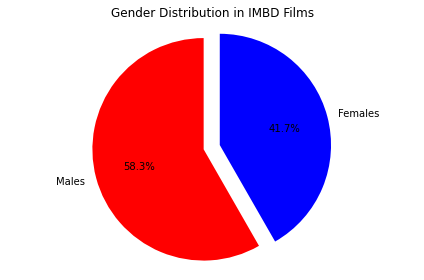

As the graph shows 58% of the actors were males (as implied by their names)
This implies we do not have a perfect gender distribution in the scraped movies
Note that this is a dirty matching approach of names with genders based on our database


In [16]:
## we count the number of males and female by distribution
df['Gender'].value_counts()
male_count =((df.Gender == 'male').sum())
female_count = ((df.Gender == 'female').sum())
## we get the o
overall_ratio = male_count / (male_count+female_count)
overall_ratio = "{:.0%}".format(overall_ratio)

## we plot a pie chart with the implied gender distribution of the actors/actresses in the movies we scraped
proportions = [male_count, female_count]
plt.pie(proportions,labels = ['Males', 'Females'],shadow = False, colors = ['red','blue'], explode = (0.15 , 0), startangle = 90,autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Gender Distribution in IMBD Films")
plt.tight_layout()
plt.show()

print("As the graph shows " + str(overall_ratio) + " of the actors were males (as implied by their names)")
print("This implies we do not have a perfect gender distribution in the scraped movies")
print("Note that this is a dirty matching approach of names with genders based on our database")

#Of course, not all the names of the actors/actresses in our scraped movies are included in the database
#Also, some names can of course be applicable for both of the classical gender labels leading to distorted results

In [ ]:
## next we will do some regressions of the gender ratio by film on the box office revenue in order